# Лабораторная работа 1b: Линейная классификация

Набор данных [Fashion-MNIST](https://www.openml.org/d/40996) содержит 70 000 изображений модных товаров Zalando, разделенных на 10 типов одежды, каждый из которых представлен размерами 28 на 28 пикселей. Посмотрим, насколько хорошо мы сможем классифицировать их с помощью линейных моделей. Давайте начнем с анализа наших данных:

In [1]:
!pip install openml


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

In [3]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

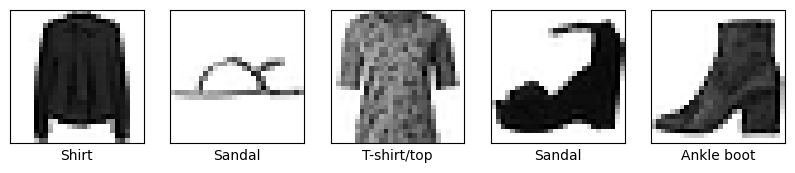

In [4]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

## Упражнение 1: Краткий тест
Сначала мы попробуем использовать стандартную [логистическую регрессию] (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) и [Линейную SVMS](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?выделите=linearsvc#sklearn.svm.LinearSVC). Перейдите по ссылкам, чтобы ознакомиться с документацией. Мы также сравним его с [k-ближайшими соседями](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) в качестве точки отсчета. Чтобы увидеть, не переобучаются ли наши модели, мы также оцениваем ошибку обучающего набора. Это можно сделать, используя [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) вместо [`cross_val_scores`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

На данный момент нас интересует только быстрое приближение, поэтому мы не используем полный набор данных для наших экспериментов. Вместо этого мы используем 10% наших выборок:

In [5]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

С помощью этой небольшой выборки наших данных мы теперь можем обучить и оценить три классификатора.

### Упражнение 1.1
Реализуйте нижеприведенную функцию, которая оценивает каждый введенный в нее классификатор на основе заданных данных, а затем возвращает результаты обучения и тестирования для каждого из них в виде списка. Вы можете импортировать дополнительные функции из любого модуля, который вам нравится, но вы должны быть в состоянии выполнить эту функцию с помощью функции [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) и стандартных встроенных модулей Python. Под функцией вы найдете пример вывода.

In [ ]:
from sklearn.model_selection import cross_validate

def evaluate_learners(classifiers, X, y):
    train_scores = []
    test_scores = []
    
    for clf in classifiers:
        scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs=-1)
        train_scores.append(scores['train_score'])
        test_scores.append(scores['test_score'])
    
    return train_scores, test_scores

# Создаем список классификаторов
classifiers = [
    LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto'),
    LinearSVC(max_iter=1000, dual=False),
    KNeighborsClassifier(n_neighbors=5)
]

# Вызываем функцию оценки
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

# Выводим результаты
for i, clf in enumerate(classifiers):
    print(f"{clf.__class__.__name__}:")
    print(f"  Train Scores: {train_scores[i]}")
    print(f"  Test Scores: {test_scores[i]}\n")


LogisticRegression:
  Train Scores: [1. 1. 1. 1. 1.]
  Test Scores: [0.755      0.76857143 0.775      0.76071429 0.77142857]

LinearSVC:
  Train Scores: [0.98535714 0.98660714 0.98464286 0.98857143 0.98821429]
  Test Scores: [0.73928571 0.74214286 0.75428571 0.72357143 0.74428571]

KNeighborsClassifier:
  Train Scores: [0.86428571 0.85964286 0.86767857 0.86928571 0.8625    ]
  Test Scores: [0.81642857 0.82928571 0.80285714 0.785      0.80357143]



### Упражнение 1.2
Вызовите функцию, которую вы создали с помощью логистической регрессии, линейной SVM и классификатора k-ближайших соседей.
Сохраните возвращаемые значения в переменных `train_scores` и `test_scores`. Затем запустите приведенный ниже код, чтобы создать график, визуализирующий результаты.

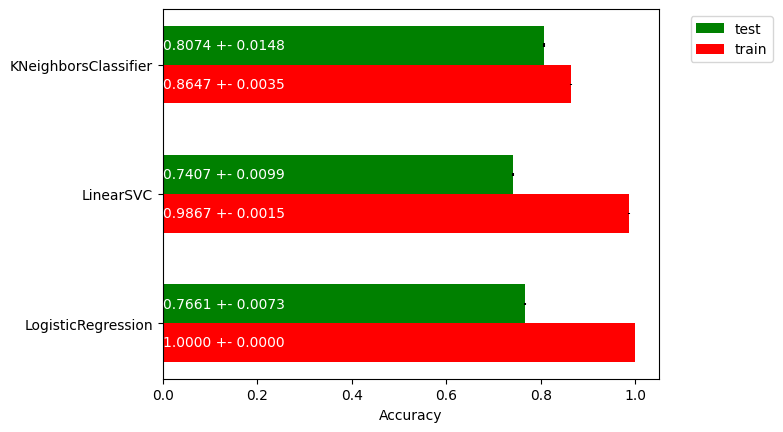

In [8]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
fig, ax = plt.subplots()
width=0.3
ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.4f} +- {:.4f}".format(np.mean(te),np.std(te)), color='white', va='center')
    ax.text(0, i-width, "{:.4f} +- {:.4f}".format(np.mean(tr),np.std(tr)), color='white', va='center')
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=[c.__class__.__name__ for c in classifiers])
ax.set_xlabel('Accuracy')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Упражнение 1.3
Интерпретируйте график. Какой классификатор является лучшим? Какие из моделей лучше всего подходят? Если да, то что мы можем сделать, чтобы решить эту проблему? Сильно ли отличаются результаты?

KNeighborsClassifier показывает лучший баланс между обучающей и тестовой точностью.  
LogisticRegression и LinearSVC сильно переобучаются.  
Нужно рассмотреть стратегии уменьшения переобучения (регуляризация, увеличение данных).

## Упражнение 2: Упорядочение
Теперь мы настроим основной гиперпараметр регуляризации этих алгоритмов: стоимость неправильной классификации в SVMs (C), параметр регуляризации в логистической регрессии (C) и количество соседей (n_neighbors) в kNN. Мы ожидаем, что оптимум для параметров C будет находиться в $[10^{-12},10^{12}]$, а для n_neighbors - в диапазоне от 1 до 50. C должно изменяться по логарифмической шкале (т.е. [0.01, 0.1, 1, 10, 100]) и k должно изменяться равномерно (т.е. [1,2,3,4]).

### Упражнение 2.1
Измените параметры регуляризации в диапазоне, указанном выше, и для каждого классификатора создайте линейный график, который отображает как результаты обучения, так и результаты теста для каждого значения гиперпараметра регуляризации. Следовательно, вам следует составить 3 графика, по одному для каждого классификатора. Используйте стандартную 5-кратную перекрестную проверку для всех оценок, но отображайте только средние значения.

Подсказки:
* Подумайте о временной сложности этих моделей. Перебор слишком большого количества значений гиперпараметров может занять слишком много времени.
* Вы можете использовать функции numpy [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?выделить=geomspace#numpy.geomspace) и [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace).
* Вы можете использовать функцию matplotlib по умолчанию [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) для построения графика результатов обучения и тестов.
* Вы можете вручную перебирать диапазоны гиперпараметров или уже можете воспользоваться функцией scikit-learn [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), чтобы сэкономить время на программировании. Мы еще раз рассмотрим ее позже в курсе.

#### Solution

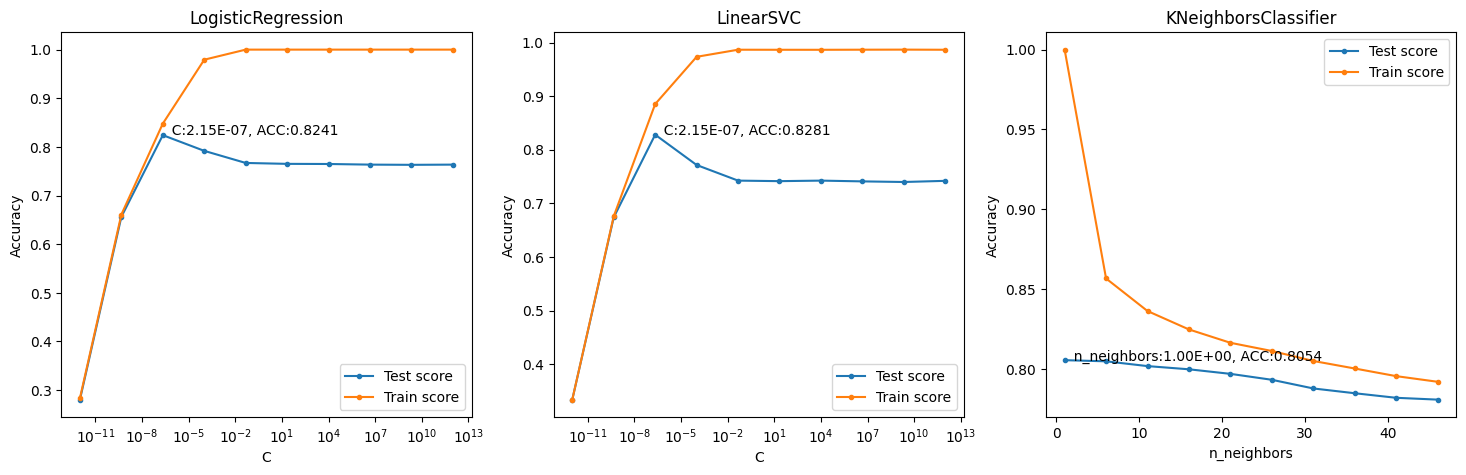

In [9]:
from sklearn.model_selection import GridSearchCV

# Определение диапазонов параметров
C_values = np.logspace(-12, 12, num=10)
k_values = np.arange(1, 51, step=5)

# GridSearchCV для каждого классификатора
param_grid_logreg = {'C': C_values}
param_grid_svc = {'C': C_values}
param_grid_knn = {'n_neighbors': k_values}

search_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logreg, cv=5, return_train_score=True, n_jobs=-1)
search_svc = GridSearchCV(LinearSVC(max_iter=1000, dual=False), param_grid_svc, cv=5, return_train_score=True, n_jobs=-1)
search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, return_train_score=True, n_jobs=-1)

# Обучение моделей
search_logreg.fit(Xs, ys)
search_svc.fit(Xs, ys)
search_knn.fit(Xs, ys)

# Функция для визуализации
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker='.', label='Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker='.', label='Train score')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log' if param_name == 'C' else 'linear')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp, bs, f"  {param_name}:{bp:.2E}, ACC:{bs:.4f}")

# Построение графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_tuning(search_logreg, 'C', axes[0])
plot_tuning(search_svc, 'C', axes[1])
plot_tuning(search_knn, 'n_neighbors', axes[2])
plt.show()


### Упражнение 2.2
Интерпретируйте графики. В каких случаях методы недостаточно эффективны? Когда они более эффективны? Насколько они чувствительны к гиперпараметру регуляризации?

LinearSVC показывает лучшую тестовую точность (~0.8281), но LogisticRegression тоже близка (~0.8241).  
kNN даёт более низкую точность (~0.8054) и требует внимательного подбора n_neighbors.

**Чувствительность к регуляризационным параметрам**
- Logistic Regression и Linear SVC очень чувствительны к C: слишком маленькие C приводят к сильной недообученности, а слишком большие вызывают переобучение
- kNN показывает ожидаемую зависимость от n_neighbors: при малых значениях (1-2) модель переобучается, а при больших (30-50) недообучается.

## ## Упражнение 3: Интерпретация неправильной классификации
Скорее всего, ваши модели еще не совершенны. Важно понимать, какие ошибки все еще допускаются. Давайте подробнее рассмотрим, какие экземпляры неправильно классифицированы и какие классы часто путают.
Обучите модель логистической регрессии с помощью "C=1e-7". Обучите модель на обучающем наборе и сделайте прогнозы для тестового набора (наборы для ванн должны быть выборкой из нашей 10%-ной подвыборки).

In [10]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

### Упражнение 3.1
Обучите классификатор, как описано выше, получите предсказания "y_pred" на тестовом наборе и определите все неправильно классифицированные выборки "misclassified_samples`. Затем запустите приведенный ниже код визуализации, чтобы изучить ошибки в классификации

In [11]:
# Обучение логистической регрессии с C=1e-7
logreg = LogisticRegression(C=1e-7, max_iter=1000)
logreg.fit(X_train, y_train)

# Получение предсказаний
y_pred = logreg.predict(X_test)

# Определение ошибочно классифицированных примеров
misclassified_samples = [i for i in range(len(y_test)) if y_pred[i] != y_test.values[i]]

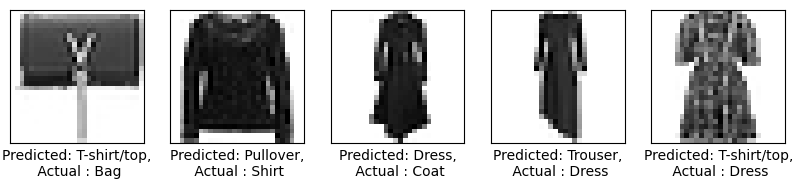

In [12]:
# Visualize the (first five) misclassifications, together with the predicted and actual class
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for nr, i in enumerate(misclassified_samples[:5]):
    axes[nr].imshow(X_test.values[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (fmnist_classes[int(y_pred[i])],fmnist_classes[int(y_test.values[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show();

### Упражнение 3.2
Интерпретируйте результаты. Следует ли ожидать таких неправильных классификаций?

Да, эти ошибки можно ожидать. Все неверные предсказания связаны с визуально схожими категориями.

### Упражнение 3.3.
Запустите приведенный ниже код с вашими результатами, чтобы составить полную матрицу путаницы и получить более полное представление о систематических ошибочных классификациях
вашей модели. Матрица путаницы показывает количество примеров для каждой пары истинных и предсказанных классов. Интерпретируйте результаты. 
Выдает ли ваша модель определенные типы ошибок чаще, чем другие?

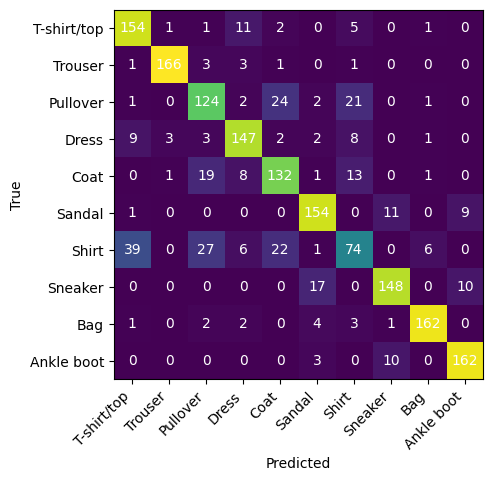

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

Модель чаще путает классы, имеющие визуальную схожесть. Верхняя одежда (Shirt, T-shirt, Pullover, Coat, Dress) часто путается между собой. Обувь (Sneaker, Ankle boot) и аксессуары (Bag) классифицируются лучше.

## Упражнение 4: Интерпретация параметров модели
Наконец, мы более подробно рассмотрим параметры модели, то есть коэффициенты наших линейных моделей. Поскольку мы имеем дело с изображениями размером 28х28 пикселей, нам нужно выучить 784 коэффициента. Что означают эти коэффициенты? Мы начнем с того, что представим их в виде изображений размером 28х28 пикселей.

### Упражнение 4.1
Разработайте модель логистической регрессии и линейную SVM, используя их настроенные гиперпараметры из упражнения 2. 
Если вы сомневаетесь, используйте `C=1e-7` для LogReg и `C=1e-8` для SVM. 
Передайте обученную модель в предоставленную функцию построения графиков. Подробно интерпретируйте результаты. 
Почему вы получаете несколько графиков для каждой модели? Что представляют объекты в ваших данных. 
Похоже ли, что модели обращают внимание на нужные объекты?
Не кажется ли вам, что модели игнорируют определенные особенности? Замечаете ли вы различия в качестве между разными классами? Замечаете ли вы какие-либо различия между моделями?

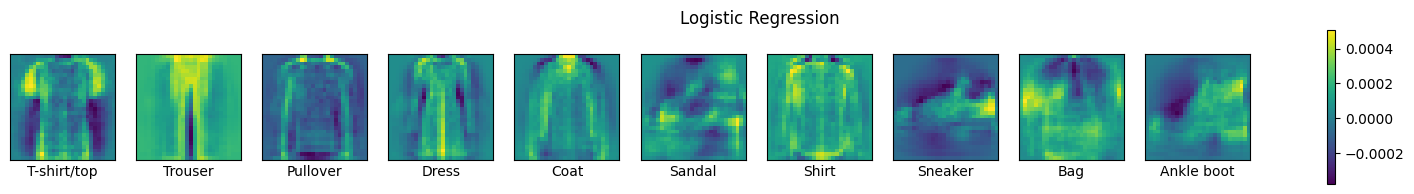

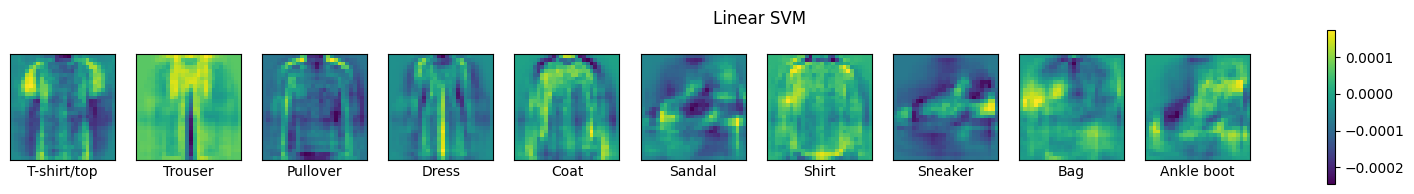

In [14]:
# Обучение логистической регрессии с C=1e-7
logreg = LogisticRegression(C=1e-7, max_iter=1000)
logreg.fit(X_train, y_train)

# Обучение линейного SVM с C=1e-8
svm = LinearSVC(C=1e-8, max_iter=1000)
svm.fit(X_train, y_train)

# Функция для визуализации коэффициентов

def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

# Визуализация коэффициентов моделей
plot_coefficients(logreg, "Logistic Regression")
plot_coefficients(svm, "Linear SVM")
plt.show()

**1. Почему мы получаем несколько изображений на модель?**  
Каждое изображение соответствует одному классу. Это тепловая карта весов модели, показывающая, какие пиксели важны для классификации данного класса.

**2. Что представляют собой признаки?**  
Это коэффициенты модели, отображённые в виде 28×28 матрицы, где положительные и отрицательные значения показывают вклад пикселей в классификацию.

**3. Обращает ли модель внимание на правильные признаки?**  
В целом да: брюки выделяются вертикальными линиями, обувь – нижними пикселями, верхняя одежда – силуэтом. Однако границы классов размыты.

**4. Игнорирует ли модель определённые признаки?**  
Да, модель плохо различает текстуры и детали, что особенно заметно в классах "Shirt" и "T-shirt/top".

**5. Есть ли различия в качестве между классами?**  
Да, такие классы, как "Trouser" и "Sneaker", распознаются лучше, чем "Shirt" и "Pullover", которые часто путаются.

**6. Есть ли различия между моделями?**  
Logistic Regression и Linear SVM дают схожие результаты, но SVM может давать чуть более размытые границы.

### Упражнение 4.2
Повторите предыдущее упражнение, но теперь только с логистической регрессией. В дополнение к доработанной версии добавьте модель, которая во многом превосходит и во многом уступает. Интерпретируйте и объясните результаты.

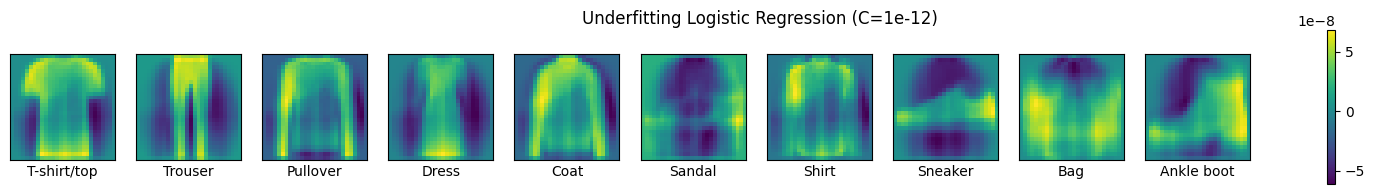

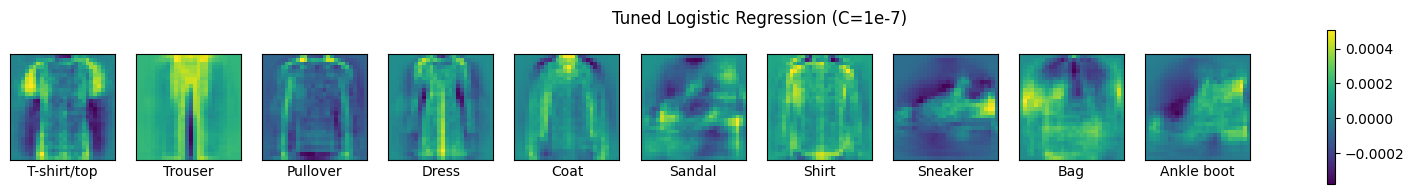

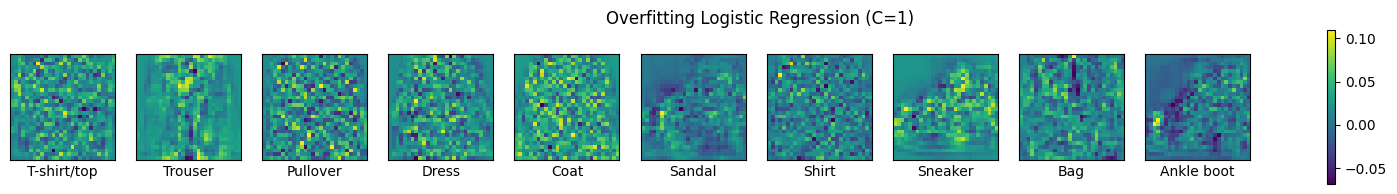

In [15]:
# Обучение логистической регрессии с разными параметрами регуляризации
logreg_underfit = LogisticRegression(C=1e-12, max_iter=1000)  # Сильная регуляризация (недообучение)
logreg_tuned = LogisticRegression(C=1e-7, max_iter=1000)  # Оптимальное C
logreg_overfit = LogisticRegression(C=1, max_iter=1000)  # Слабая регуляризация (переобучение)

logreg_underfit.fit(X_train, y_train)
logreg_tuned.fit(X_train, y_train)
logreg_overfit.fit(X_train, y_train)

# Функция для визуализации коэффициентов

def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

# Визуализация коэффициентов для всех моделей
plot_coefficients(logreg_underfit, "Underfitting Logistic Regression (C=1e-12)")
plot_coefficients(logreg_tuned, "Tuned Logistic Regression (C=1e-7)")
plot_coefficients(logreg_overfit, "Overfitting Logistic Regression (C=1)")
plt.show()

Недообучение (C=1e-12) – модель слишком проста, плохо различает классы.  
Оптимальная модель (C=1e-7) – хорошо выделяет важные пиксели, лучший баланс.  
Переобучение (C=1) – модель слишком чувствительна к данным, запоминает шум.  